In [1]:
import pandas as pd
df = pd.read_csv('강남구전세데이터_마지막.csv')
df

,보증금(만원),건축년도,구분,전용면적(㎡),층,도로명주소_x,계약시작,계약종료,계약년월일,건축나이,...,행정구,행정구코드,스타벅스 개수_y,미쉐린 개수,맥도날드 개수,대규모점포 개수,전통시장 개수,역세권 개수,금리,유치원 개수
0,7500,1989,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-06-01,2024-06-01,2022-06-01,34,...,개포동,0,0,0,0,0,0,0,4.04,2
1,14333,1991,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-10-01,2024-10-01,2022-10-05,32,...,개포동,0,0,0,0,0,0,0,4.82,2
2,17115,1991,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-07-01,2024-07-01,2022-07-07,32,...,개포동,0,0,0,0,0,0,0,4.16,2
3,17640,1991,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-07-01,2024-07-01,2022-07-07,32,...,개포동,0,0,0,0,0,0,0,4.16,2
4,7500,1989,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-06-01,2024-06-01,2022-06-01,34,...,개포동,0,0,0,0,0,0,0,4.04,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87356,45000,2004,오피스텔,66.64,8.0,서울특별시 강남구 역삼로 432,NaN,NaN,2019-07-22,19,...,대치동,2,3,1,1,1,0,0,2.64,1
87357,38000,2005,오피스텔,43.68,5.0,서울특별시 강남구 압구정로 461,NaN,NaN,2019-06-21,18,...,청담동,13,3,17,0,2,0,0,2.74,1
87358,23500,2014,오피스텔,31.57,5.0,서울특별시 강남구 도산대로 406,NaN,NaN,2019-07-20,9,...,청담동,13,3,31,1,2,0,0,2.64,0
87359,3000,2020,오피스텔,29.51,6.0,서울특별시 강남구 논현로20길 12,NaN,NaN,2020-09-08,3,...,개포동,0,1,0,0,0,0,0,2.44,1


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import KFold
from IPython.display import HTML, display
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


pd.options.display.max_rows = 1000
pd.options.display.max_columns = 20

In [3]:
import warnings

# 경고 무시하기
warnings.filterwarnings("ignore")
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'# (위도우용)

In [4]:
df.describe()

,보증금(만원),건축년도,전용면적(㎡),층,건축나이,Latitude,Longitude,행정구코드,스타벅스 개수_y,미쉐린 개수,맥도날드 개수,대규모점포 개수,전통시장 개수,역세권 개수,금리,유치원 개수
count,8.736100e+04,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000,87361.000000
mean,5.921226e+04,2000.491901,67.776567,6.859915,22.508099,37.498124,127.057102,5.422694,2.651034,1.253111,0.343162,0.528291,0.132267,0.834732,3.189517,1.074610
std,4.606194e+04,12.485836,37.183271,5.758265,12.485836,0.015544,0.022320,4.148519,2.424018,3.290181,0.520519,0.878938,0.347259,0.811884,0.669428,0.833464
min,4.500000e+02,1972.000000,11.390000,-1.000000,0.000000,37.460288,127.018254,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.390000,0.000000
25%,2.520000e+04,1992.000000,40.560000,3.000000,10.000000,37.488198,127.040612,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.560000,0.000000
50%,4.650000e+04,2002.000000,59.920000,5.000000,21.000000,37.496665,127.051556,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.080000,1.000000
75%,8.000000e+04,2013.000000,84.930000,10.000000,31.000000,37.508595,127.068504,9.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.510000,2.000000
max,1.100000e+06,2023.000000,301.470000,67.000000,51.000000,37.533026,127.112686,13.000000,10.000000,32.000000,2.000000,5.000000,2.000000,3.000000,4.820000,3.000000


In [5]:
df.describe(include = 'object')

,구분,도로명주소_x,계약시작,계약종료,계약년월일,행정구
count,87361,87361,25069,25069,87361,87361
unique,4,3729,55,80,1821,14
top,아파트,서울특별시 강남구 삼성로 212,2022-02-01,2024-02-01,2022-05-11,역삼동
freq,53963,2969,1958,1923,155,14741


In [6]:
# 행정구와 구분에 따른 보증금 순위
df.groupby(['도로명주소_x','행정구','전용면적(㎡)'])['보증금(만원)'].mean().sort_values(ascending=False).reset_index()


,도로명주소_x,행정구,전용면적(㎡),보증금(만원)
0,서울특별시 강남구 압구정로79길 88,청담동,273.96,1015000.0
1,서울특별시 강남구 도산대로99길 68,청담동,219.96,710000.0
2,서울특별시 강남구 압구정로75길 27,청담동,219.43,700000.0
3,서울특별시 강남구 도산대로99길 68,청담동,182.58,600000.0
4,서울특별시 강남구 도산대로99길 68,청담동,171.60,500000.0
...,...,...,...,...
9850,서울특별시 강남구 도곡로13길 16,역삼동,40.54,2000.0
9851,서울특별시 강남구 개포로138길 21,일원동,21.05,2000.0
9852,서울특별시 강남구 논현로115길 41,논현동,75.45,2000.0
9853,서울특별시 강남구 역삼로23길 8,역삼동,60.27,1700.0


# 행정구별/집 타입/보증금

<Figure size 1000x600 with 0 Axes>

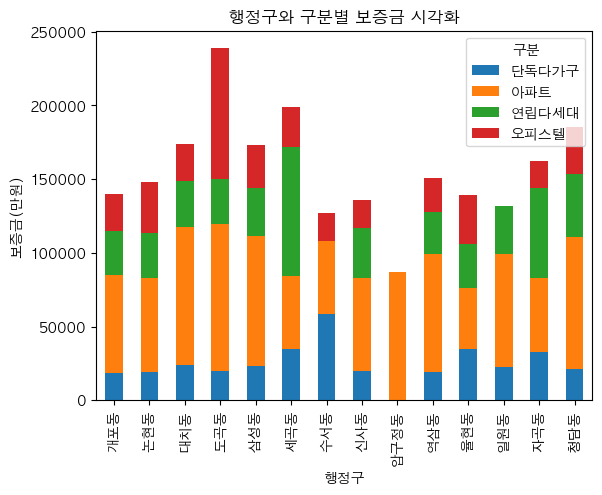

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# AppleGothic 폰트 설정
rc('font', family='AppleGothic')

# 행정구와 구분별 보증금 데이터 정리
grouped_data = df.groupby(['행정구', '구분'])['보증금(만원)'].mean().unstack()

# Matplotlib을 이용한 시각화
plt.figure(figsize=(10, 6))

# 행정구와 구분별 보증금 시각화
grouped_data.plot(kind='bar', stacked=True)

plt.title('행정구와 구분별 보증금 시각화')
plt.xlabel('행정구')
plt.ylabel('보증금(만원)')
plt.legend(title='구분')

plt.show()


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87361 entries, 0 to 87360
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   보증금(만원)    87361 non-null  int64  
 1   건축년도       87361 non-null  int64  
 2   구분         87361 non-null  object 
 3   전용면적(㎡)    87361 non-null  float64
 4   층          87361 non-null  float64
 5   도로명주소_x    87361 non-null  object 
 6   계약시작       25069 non-null  object 
 7   계약종료       25069 non-null  object 
 8   계약년월일      87361 non-null  object 
 9   건축나이       87361 non-null  int64  
 10  Latitude   87361 non-null  float64
 11  Longitude  87361 non-null  float64
 12  행정구        87361 non-null  object 
 13  행정구코드      87361 non-null  int64  
 14  스타벅스 개수_y  87361 non-null  int64  
 15  미쉐린 개수     87361 non-null  int64  
 16  맥도날드 개수    87361 non-null  int64  
 17  대규모점포 개수   87361 non-null  int64  
 18  전통시장 개수    87361 non-null  int64  
 19  역세권 개수     87361 non-null  int64  
 20  금리    

# 행정구별 맥도날드/보증금

<Figure size 1000x600 with 0 Axes>

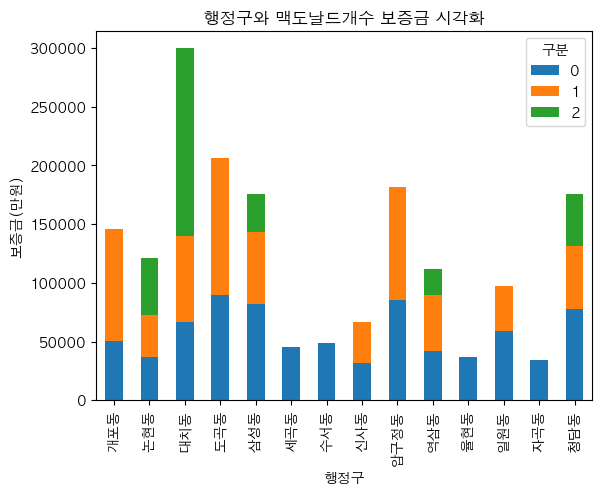

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# AppleGothic 폰트 설정
rc('font', family='AppleGothic')

# 행정구와 구분별 보증금 데이터 정리
grouped_data = df.groupby(['행정구', '맥도날드 개수'])['보증금(만원)'].mean().unstack()

# Matplotlib을 이용한 시각화
plt.figure(figsize=(10, 6))

# 행정구와 구분별 보증금 시각화
grouped_data.plot(kind='bar', stacked=True)

plt.title('행정구와 맥도날드개수 보증금 시각화')
plt.xlabel('행정구')
plt.ylabel('보증금(만원)')
plt.legend(title='구분')

plt.show() 

# 아~ 너무 큰 연속형 자료형(전용면적같은)은 구분(band를 만들어보아야겠다.)
# 5평~10평, 10평~15평,15평~20평, 20평~25평 등등.. 그외 대부분이 연속형자료네 ㅠㅠ 범위를 만들어봐야겠어!


## 행정구별 스타벅스 개수/보증금 

<Figure size 1000x600 with 0 Axes>

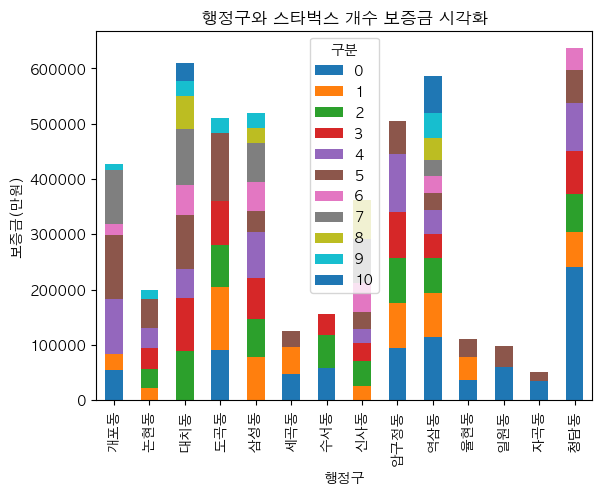

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

rc('font', family='AppleGothic')

grouped_data = df.groupby(['행정구', '스타벅스 개수_y'])['보증금(만원)'].mean().unstack()

plt.figure(figsize=(10, 6))

grouped_data.plot(kind='bar', stacked=True)

plt.title('행정구와 스타벅스 개수 보증금 시각화')
plt.xlabel('행정구')
plt.ylabel('보증금(만원)')
plt.legend(title='구분')

plt.show() 

# 스타벅스가 없는 행정구의 순위는 어떻게 될까?

<Figure size 1000x600 with 0 Axes>

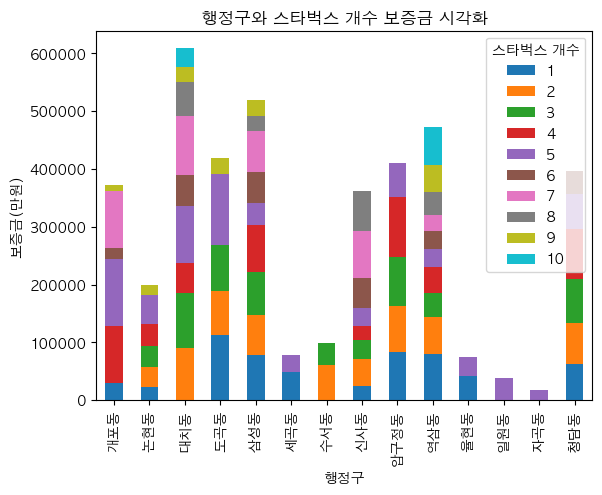

In [11]:
filtered_df = df[df['스타벅스 개수_y'] != 0]

# 행정구와 스타벅스 개수별 보증금 데이터 정리
grouped_data = filtered_df.groupby(['행정구', '스타벅스 개수_y'])['보증금(만원)'].mean().unstack()

# Matplotlib을 이용한 시각화
plt.figure(figsize=(10, 6))

# 행정구와 스타벅스 개수별 보증금 시각화
grouped_data.plot(kind='bar', stacked=True)

plt.title('행정구와 스타벅스 개수 보증금 시각화')
plt.xlabel('행정구')
plt.ylabel('보증금(만원)')
plt.legend(title='스타벅스 개수')

plt.show()

# 유치원개수에 따른 행정구별 보증금의 관계는?

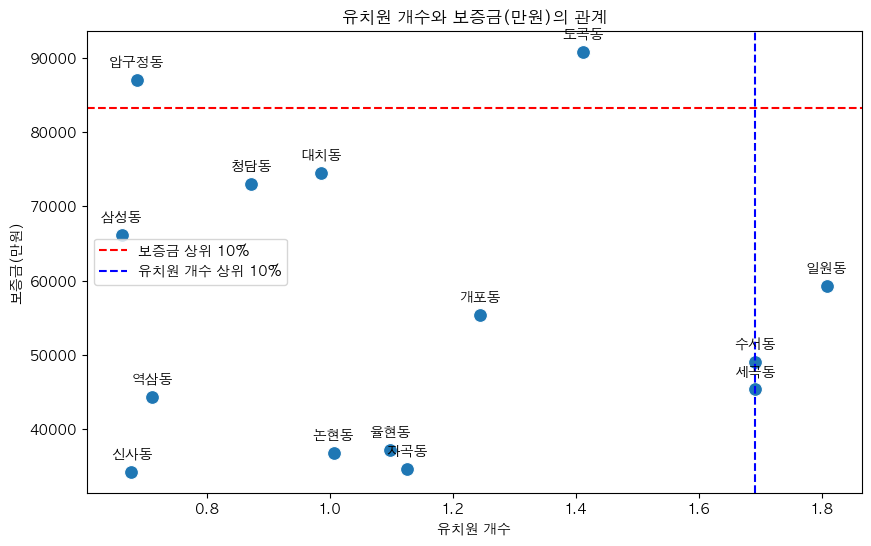

In [12]:
# 행정구를 기준으로 그룹화하여 평균 계산
grouped_data = df.groupby('행정구').mean()

# 유치원 개수와 보증금(만원) 상위 10% 값 계산
top_10_percent_count = grouped_data['유치원 개수'].quantile(0.9)
top_10_percent_deposit = grouped_data['보증금(만원)'].quantile(0.9)

# 시각화
plt.figure(figsize=(10, 6))

ax = sns.scatterplot(data=grouped_data, x='유치원 개수', y='보증금(만원)', s=100)
plt.axhline(y=top_10_percent_deposit, color='red', linestyle='--', label='보증금 상위 10%')
plt.axvline(x=top_10_percent_count, color='blue', linestyle='--', label='유치원 개수 상위 10%')
plt.title('유치원 개수와 보증금(만원)의 관계')
plt.xlabel('유치원 개수')
plt.ylabel('보증금(만원)')

for i, row in grouped_data.iterrows():
    ax.annotate(i, (row['유치원 개수'], row['보증금(만원)']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

plt.legend()
plt.show()


# 대형점포개수에 따른 행정구별 보증금의 관계는?

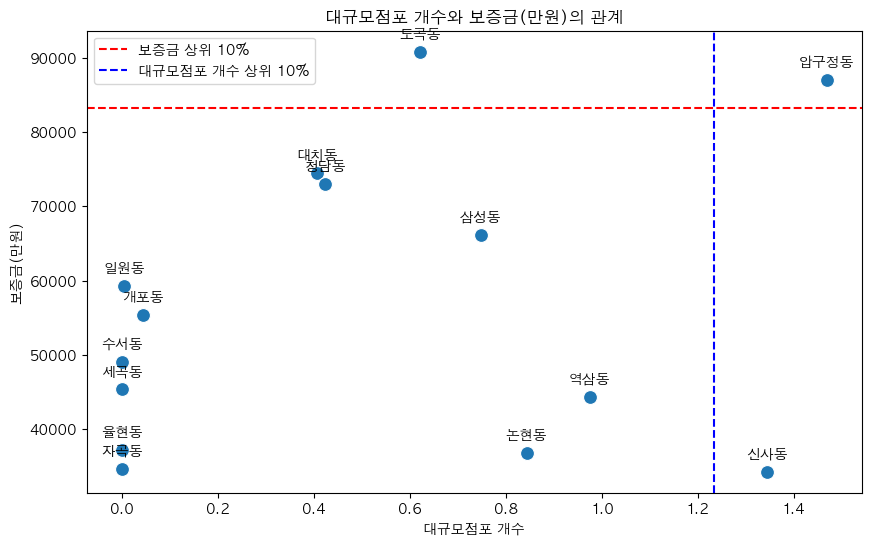

In [13]:
# 행정구를 기준으로 그룹화하여 평균 계산
grouped_data = df.groupby('행정구').mean()

# 유치원 개수와 보증금(만원) 상위 10% 값 계산
top_10_percent_count = grouped_data['대규모점포 개수'].quantile(0.9)
top_10_percent_deposit = grouped_data['보증금(만원)'].quantile(0.9)

# 시각화
plt.figure(figsize=(10, 6))

ax = sns.scatterplot(data=grouped_data, x='대규모점포 개수', y='보증금(만원)', s=100)
plt.axhline(y=top_10_percent_deposit, color='red', linestyle='--', label='보증금 상위 10%')
plt.axvline(x=top_10_percent_count, color='blue', linestyle='--', label='대규모점포 개수 상위 10%')
plt.title('대규모점포 개수와 보증금(만원)의 관계')
plt.xlabel('대규모점포 개수')
plt.ylabel('보증금(만원)')

for i, row in grouped_data.iterrows():
    ax.annotate(i, (row['대규모점포 개수'], row['보증금(만원)']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

plt.legend()
plt.show()


# 미슐랭 음식점에 따른 보증금 

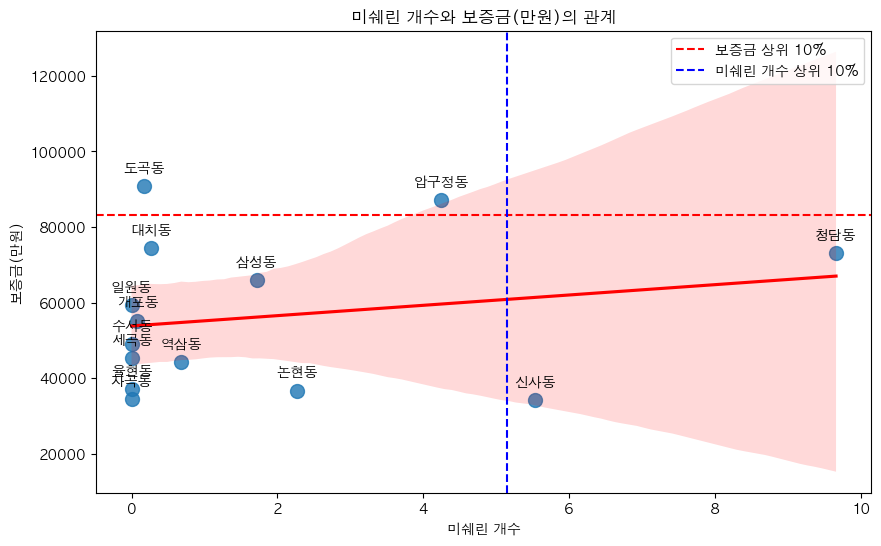

In [14]:
grouped_data = df.groupby('행정구').mean()

# 보증금(만원) 상위 10% 값 계산
top_10_percent_count = grouped_data['미쉐린 개수'].quantile(0.9)
top_10_percent_deposit = grouped_data['보증금(만원)'].quantile(0.9)

# 시각화
plt.figure(figsize=(10, 6))

ax = sns.regplot(data=grouped_data, x='미쉐린 개수', y='보증금(만원)', scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.axhline(y=top_10_percent_deposit, color='red', linestyle='--', label='보증금 상위 10%')
plt.axvline(x=top_10_percent_count, color='blue', linestyle='--', label='미쉐린 개수 상위 10%')
plt.title('미쉐린 개수와 보증금(만원)의 관계')
plt.xlabel('미쉐린 개수')
plt.ylabel('보증금(만원)')

for i, row in grouped_data.iterrows():
    ax.annotate(i, (row['미쉐린 개수'], row['보증금(만원)']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)

plt.legend()
plt.show()

# 금리와 보증금 관계성 확인

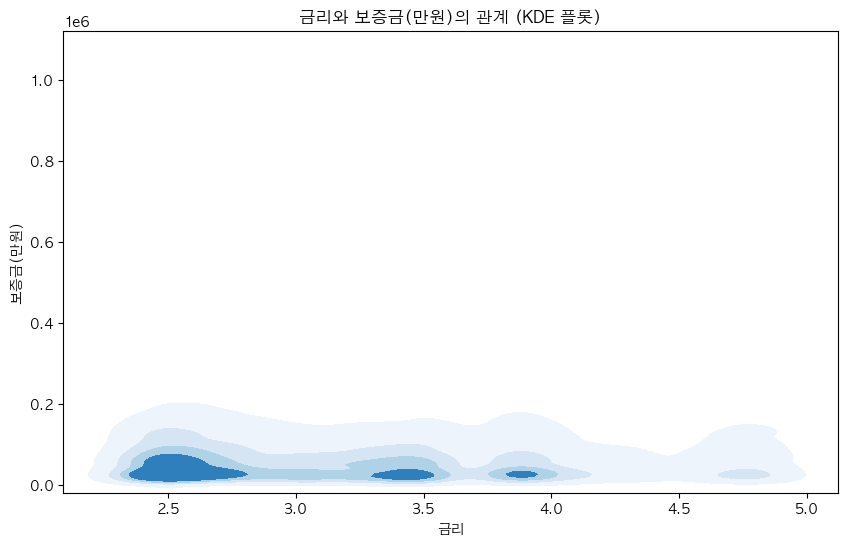

In [15]:
import warnings

# 경고 무시하기
warnings.filterwarnings("ignore")
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'# (위도우용)
plt.figure(figsize=(10, 6))

# 2D 커널 밀도 추정(KDE) 플롯
sns.kdeplot(data=df, x='금리', y='보증금(만원)', fill=True, cmap='Blues', levels=5, thresh=0.05)

plt.title('금리와 보증금(만원)의 관계 (KDE 플롯)')
plt.xlabel('금리')
plt.ylabel('보증금(만원)')

plt.show()

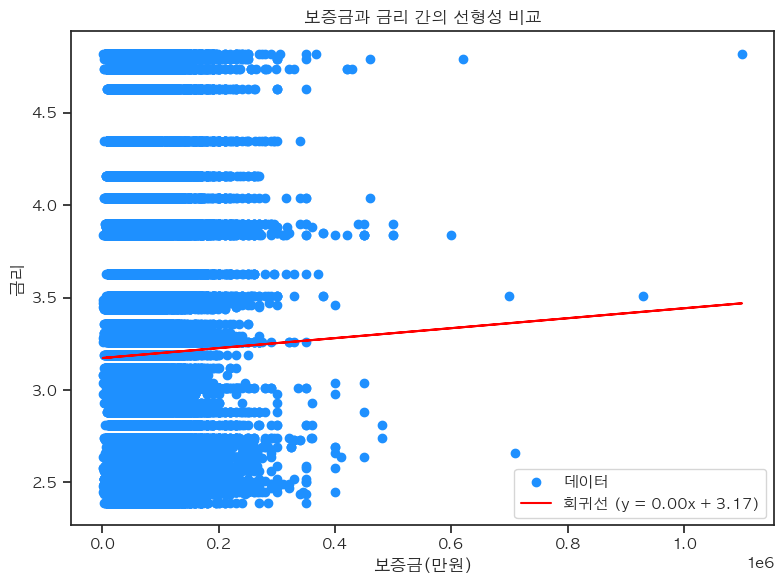

In [21]:
import warnings

# 경고 무시하기
warnings.filterwarnings("ignore")
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'AppleGothic'# (위도우용)

# 시각화 설정
plt.figure(figsize=(8, 6))

# 산점도와 회귀선
plt.scatter(df['보증금(만원)'], df['금리'], color='dodgerblue', label='데이터')
m, b = np.polyfit(df['보증금(만원)'], df['금리'], 1)
plt.plot(df['보증금(만원)'], m * df['보증금(만원)'] + b, color='red', label=f'회귀선 (y = {m:.2f}x + {b:.2f})')

# 라벨 및 범례 설정
plt.title('보증금과 금리 간의 선형성 비교')
plt.xlabel('보증금(만원)')
plt.ylabel('금리')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
df.info()

In [ ]:
df['대규모점포 개수'].max()

In [3]:
# 2. 누락된 값 있는 행에서 어떤 정보를 얻을 수 있는지 확인하는 것이 좋다.
df[df.isna().any(axis = 1)]

,보증금(만원),건축년도,구분,전용면적(㎡),층,도로명주소_x,계약시작,계약종료,계약년월일,건축나이,...,행정구,행정구코드,스타벅스 개수_y,미쉐린 개수,맥도날드 개수,대규모점포 개수,전통시장 개수,역세권 개수,금리,유치원 개수
8,7000,1989,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,NaN,NaN,2018-08-10,34,...,개포동,0,0,0,0,0,0,0,3.36,2
9,9000,1989,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,NaN,NaN,2018-07-17,34,...,개포동,0,0,0,0,0,0,0,3.44,2
10,9000,2000,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,NaN,NaN,2018-07-24,23,...,개포동,0,0,0,0,0,0,0,3.44,2
11,9000,1990,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,NaN,NaN,2018-03-28,33,...,개포동,0,0,0,0,0,0,0,3.45,2
12,9000,1994,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,NaN,NaN,2018-03-31,29,...,개포동,0,0,0,0,0,0,0,3.45,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87356,45000,2004,오피스텔,66.64,8.0,서울특별시 강남구 역삼로 432,NaN,NaN,2019-07-22,19,...,대치동,2,3,1,1,1,0,0,2.64,1
87357,38000,2005,오피스텔,43.68,5.0,서울특별시 강남구 압구정로 461,NaN,NaN,2019-06-21,18,...,청담동,13,3,17,0,2,0,0,2.74,1
87358,23500,2014,오피스텔,31.57,5.0,서울특별시 강남구 도산대로 406,NaN,NaN,2019-07-20,9,...,청담동,13,3,31,1,2,0,0,2.64,0
87359,3000,2020,오피스텔,29.51,6.0,서울특별시 강남구 논현로20길 12,NaN,NaN,2020-09-08,3,...,개포동,0,1,0,0,0,0,0,2.44,1


In [4]:
df['구분_빈도'] = df.groupby('구분')['구분'].transform('count')
df

,보증금(만원),건축년도,구분,전용면적(㎡),층,도로명주소_x,계약시작,계약종료,계약년월일,건축나이,...,행정구코드,스타벅스 개수_y,미쉐린 개수,맥도날드 개수,대규모점포 개수,전통시장 개수,역세권 개수,금리,유치원 개수,구분_빈도
0,7500,1989,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-06-01,2024-06-01,2022-06-01,34,...,0,0,0,0,0,0,0,4.04,2,9472
1,14333,1991,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-10-01,2024-10-01,2022-10-05,32,...,0,0,0,0,0,0,0,4.82,2,9472
2,17115,1991,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-07-01,2024-07-01,2022-07-07,32,...,0,0,0,0,0,0,0,4.16,2,9472
3,17640,1991,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-07-01,2024-07-01,2022-07-07,32,...,0,0,0,0,0,0,0,4.16,2,9472
4,7500,1989,단독다가구,44.00,3.0,서울특별시 강남구 논현로4길,2022-06-01,2024-06-01,2022-06-01,34,...,0,0,0,0,0,0,0,4.04,2,9472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87356,45000,2004,오피스텔,66.64,8.0,서울특별시 강남구 역삼로 432,NaN,NaN,2019-07-22,19,...,2,3,1,1,1,0,0,2.64,1,8145
87357,38000,2005,오피스텔,43.68,5.0,서울특별시 강남구 압구정로 461,NaN,NaN,2019-06-21,18,...,13,3,17,0,2,0,0,2.74,1,8145
87358,23500,2014,오피스텔,31.57,5.0,서울특별시 강남구 도산대로 406,NaN,NaN,2019-07-20,9,...,13,3,31,1,2,0,0,2.64,0,8145
87359,3000,2020,오피스텔,29.51,6.0,서울특별시 강남구 논현로20길 12,NaN,NaN,2020-09-08,3,...,0,1,0,0,0,0,0,2.44,1,8145


In [10]:
df['구분_빈도'] = df['구분_빈도']/len(df)
df.tail()

# 짜잔 범주형이 특성공학으로 수치형이 되었어요

,보증금(만원),건축년도,구분,전용면적(㎡),층,도로명주소_x,계약시작,계약종료,계약년월일,건축나이,...,행정구코드,스타벅스 개수_y,미쉐린 개수,맥도날드 개수,대규모점포 개수,전통시장 개수,역세권 개수,금리,유치원 개수,구분_빈도
87356,45000,2004,오피스텔,66.64,8.0,서울특별시 강남구 역삼로 432,NaN,NaN,2019-07-22,19,...,2,3,1,1,1,0,0,2.64,1,0.000001
87357,38000,2005,오피스텔,43.68,5.0,서울특별시 강남구 압구정로 461,NaN,NaN,2019-06-21,18,...,13,3,17,0,2,0,0,2.74,1,0.000001
87358,23500,2014,오피스텔,31.57,5.0,서울특별시 강남구 도산대로 406,NaN,NaN,2019-07-20,9,...,13,3,31,1,2,0,0,2.64,0,0.000001
87359,3000,2020,오피스텔,29.51,6.0,서울특별시 강남구 논현로20길 12,NaN,NaN,2020-09-08,3,...,0,1,0,0,0,0,0,2.44,1,0.000001
87360,17000,2003,오피스텔,29.40,7.0,서울특별시 강남구 언주로 432-10,NaN,NaN,2020-11-25,20,...,9,9,2,1,0,0,0,2.56,0,0.000001


/var/folders/yh/smj7ptzs057g14vbhqqqhcq00000gn/T/ipykernel_10215/568246809.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
